In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Commodities'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-03-04 to 2019-06-28 - 51'

In [18]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 10) & (stat['21-shrp'] > 0.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
NIB,62,5.034423,5.471914,0.889589,8.114902
SGOL,62,1.533557,3.747174,0.364779,3.906185
BAR,62,1.522701,3.729939,0.363554,3.942377
GLD,62,1.511131,3.739625,0.359518,3.986548
IAU,62,1.517153,3.765273,0.358669,3.946330
OUNZ,62,1.501195,3.748211,0.356044,3.932153
UBG,62,1.568745,3.969099,0.353249,3.991596
DGL,62,1.407818,3.689199,0.336428,4.015770
UGL,62,2.762845,7.770354,0.334113,8.395185


In [25]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, sr=0)

['NIB'] 2.6229803934836204 0.6 1.6229803934836204 0.8895894508509611
['NIB', 'SGOL'] 1.1651614254019913 -0.03694731483218605 1.2021087402341772 0.6271842030351942


['NIB', 'SGOL']

In [26]:
quote.setup_mask(['NIB', 'SGOL'])
quote.find_optimal_ratio(21, 2)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'NIB': 0.33, 'SGOL': 0.67}, 2.6721, 3.0377)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
NIB,62.0,5.034423,5.471914,-5.457811,1.210373,5.482695,9.803688,14.033742,0.889589,8.114902
Portfolio,62.0,2.682350,3.030807,-2.880772,0.399661,2.500691,4.954563,8.329248,0.830037,4.426949
SGOL,62.0,1.533557,3.747174,-3.545374,-0.941531,0.387267,3.462340,10.683149,0.364779,3.906185
BAR,62.0,1.522701,3.729939,-3.487491,-0.971329,0.428540,3.427502,10.694768,0.363554,3.942377
GLD,62.0,1.511131,3.739625,-3.562277,-0.940581,0.395548,3.407481,10.634784,0.359518,3.986548
IAU,62.0,1.517153,3.765273,-3.551695,-0.951964,0.363216,3.454467,10.821806,0.358669,3.946330


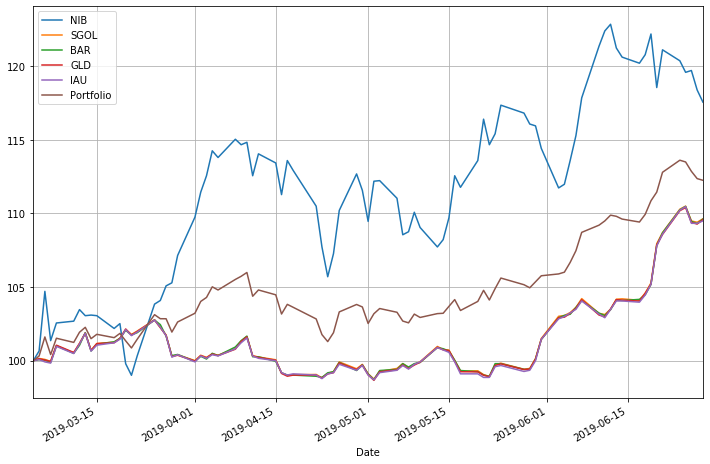

In [28]:
%pylab inline
quote.setup_mask(['NIB', 'SGOL'])
quote.graph(21, {'NIB': 0.33, 'SGOL': 0.67})